# Try to recover Kepler rotation periods in TESS light curves.

In [1]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tess_stars2px import tess_stars2px_function_entry
import tess_rotation as tr
import eleanor
from astroquery.mast import Tesscut

In [3]:
# ticid = "164668179"
# tesscut_path = "/Users/rangus/projects/TESS-rotation/data/TESScut"
# time, flux = tr.CPM_recover(ticid, tesscut_path)

Load Lucy's crossmatched table.

In [4]:
df = pd.read_csv("~/Downloads/Kepler_Tess.csv")
df = df.drop_duplicates(subset="TIC")
print(np.shape(df))
df.head()

(254, 171)


,Unnamed: 0,Unnamed: 0.1,KIDs_x,ra,dec,designation,TIC,MatchRa,MatchDEC,dstArcSec,...,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
0,0,201,3545104.0,291.565434,38.671523,Gaia DR2 2052740693844613760,137218741,291.565215,38.672069,2.060249,...,SPOC,CIRCLE ICRS 291.56521502 38.67206903 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000527880,17003189670
1,1,372,4489051.0,297.403196,39.576456,Gaia DR2 2073628081882172928,169456040,297.403222,39.576836,1.369403,...,SPOC,CIRCLE ICRS 297.40322214 39.57683635 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000532865,17003183022
3,3,1035,6611875.0,293.497058,42.060352,Gaia DR2 2077632567645823616,270608640,293.496577,42.059973,1.875803,...,SPOC,CIRCLE ICRS 293.49657685 42.05997250 0.00138889,NaN,mast:TESS/product/tess2019226182529-s0015-0000...,PUBLIC,False,NaN,science,17000561762,17003278948
5,5,1211,6671560.0,284.631030,42.159107,Gaia DR2 2104144507406725120,164730199,284.630852,42.159076,0.487288,...,SPOC,CIRCLE ICRS 284.63085160 42.15907596 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000535790,17003191662
6,6,1264,6679371.0,287.972834,42.107653,Gaia DR2 2102495759660459648,158632244,287.972841,42.107707,0.195909,...,SPOC,CIRCLE ICRS 287.97284072 42.10770693 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000536753,17003194364


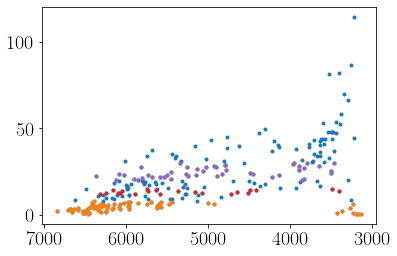

In [23]:
plt.plot(df.Teff, df.Prot, ".")
plt.gca().invert_xaxis()

short = df.Prot.values < 8
plt.plot(df.Teff.values[short], df.Prot.values[short], ".")
medium = (df.Prot.values < 15) & (df.Prot.values > 12)
plt.plot(df.Teff.values[medium], df.Prot.values[medium], "C3.")
long = (df.Prot.values < 30) & (df.Prot.values > 20)
plt.plot(df.Teff.values[long], df.Prot.values[long], "C4.")

How many stars have two sectors?

In [24]:
# ras = df.ra.values[medium]
# decs = df.dec.values[medium]
# ticids = df.TIC.values[medium]

ras = df.ra.values[long]
decs = df.dec.values[long]
ticids = df.TIC.values[long]

double_inds = []
for i in range(len(ras)):
    outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
        tess_stars2px_function_entry(ticids[i], ras[i], decs[i])
    if len(outSec) > 1:
        if outSec[0] == 14 and outSec[1] == 15:
            print(outSec, outID[0])
            double_inds.append(i)

[14 15] 270608640
[14 15] 270608461
[14 15] 159305212
[14 15] 271427268
[14 15] 271042255
[14 15] 26540659
[14 15] 63210277
[14 15] 271969239
[14 15] 268303870
[14 15 26] 243271721
[14 15] 27007362
[14 15] 240177177
[14 15] 272279823
[14 15] 272280783
[14 15] 299032942
[14 15] 26960898
[14 15 26] 48305562
[14 15] 26538131
[14 15] 28308696
[14 15] 417676374
[14 15] 158787519
[14 15 26] 158322401
[14 15] 272275427
[14 15] 271547614
[14 15] 240178277
[14 15] 184089663
[14 15] 272078312


10.9142
270608461


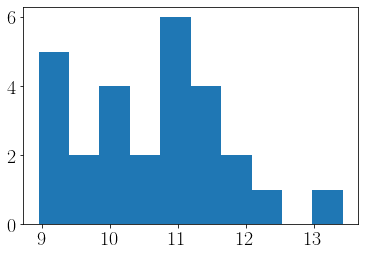

In [29]:
plt.hist(df.Tmag.values[long][double_inds]);
print(df.Tmag.values[long][double_inds][1])
print(df.TIC.values[long][double_inds][1])


In [8]:
brightest = df.Tmag.values[medium][double_inds] == min(df.Tmag.values[medium][double_inds])
faintest = df.Tmag.values[medium][double_inds] == max(df.Tmag.values[medium][double_inds])


print(df.TIC.values[medium][double_inds][brightest], df.Tmag.values[medium][double_inds][brightest], df.Prot.values[medium][double_inds][brightest])
print(df.TIC.values[medium][double_inds][faintest], df.Tmag.values[medium][double_inds][faintest], df.Prot.values[medium][double_inds][faintest])

[164668179] [8.1756] [14.448]
[48504458] [12.0159] [13.64]


In [19]:
star = eleanor.Source(tic=164668179, sector=14, tc=True)

tesscut_path = "/Users/rangus/projects/TESS-rotation/data/TESScut"
path_to_tesscut = "{0}/astrocut_{1:12}_{2:13}_{3}x{4}px".format(tesscut_path, star.coords[0], star.coords[1], 68, 68)
fits_only = "tess-s{0}-{1}-{2}_{3:.6f}_{4:.6f}_{5}x{6}_astrocut.fits".format(
    str(int(star.sector)).zfill(4), star.camera, star.chip, star.coords[0], star.coords[1], 68, 68)
print(path_to_tesscut)

/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_284.152699424902_47.6564342215787_68x68px


In [21]:
if not os.path.exists(path_to_tesscut):
    os.mkdir(path_to_tesscut)
    
hdulist = Tesscut.download_cutouts(objectname="TIC 164668179", size=68, path=path_to_tesscut)

Inflating...


NameError: name 'manifest' is not defined

In [8]:
ticid = "164668179"
tesscut_path = "/Users/rangus/projects/TESS-rotation/data/TESScut"
time, flux = tr.CPM_recover(ticid, tesscut_path)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
import lightkurve as lk
from lightkurve import search_targetpixelfile

tess_periods = np.zeros(len(df))
for i in range(len(df)):
    
    print("Downloading...")
#     try:
    tpf14 = search_targetpixelfile('TIC {}'.format(df.TIC.values[short][i]), sector=14).download()

    # Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
    lc14 = tpf14.to_lightcurve(aperture_mask=tpf14.pipeline_mask)

    print("Sigma clipping...")
#     m1, m2 = lc14.time < 1697, lc14.time > 1697
#     med1, med2 = np.median(lc14.flux[m1]), np.median(lc14.flux[m2])
#     time = np.concatenate((lc14.time[m1], lc14.time[m2]))
#     flux = np.concatenate((lc14.flux[m1]/med1-1, lc14.flux[m2]/med2-1))
#     flux_err = np.concatenate((lc14.flux_err[m1]/med1, lc14.flux_err[m2]/med2))
    med = np.median(flux)
    time, flux, flux_err = lc14.time, lc14.flux/med - 1, lc14.flux_err/med

    # Do an initial sigma clip to remove big outliers.
    m = ss.sigma_clip(flux, nsigma=6)
    x, y, yerr = time[m], flux[m], flux_err[m]

    # Then a sigma clip using a Sav-Gol filter for smoothing
    mask, smooth = ss.filter_sigma_clip(x, y, window_length=199)

    t, f, ferr = x[mask], y[mask], yerr[mask]

    # plt.figure(figsize=(16, 4), dpi=200)
    plt.plot(time, flux, ".", label="Outliers")
    plt.plot(t, f, "k.", label="Clipped")
    plt.plot(x, smooth, label="Smoothed light curve")
    plt.xlabel("Time [days]")
    plt.ylabel("Flux");
    plt.ylim(-.02, .02);
    plt.show()

    print("Measuring period...")
    rotate = ss.RotationModel(t, f, ferr)
    ls_period = rotate.ls_rotation()

    print(df.TIC.values[short][i], "mag = ", df.Tmag.values[short][i], "Kepler period = ", df.Prot.values[short][i])
    print("period = ", ls_period)
    tess_periods[i] = ls_period
#     except:
#         pass

Downloading...


KeyboardInterrupt: 